<a href="https://colab.research.google.com/github/Untick/NetOptik/blob/main/Shironin%20Igor/%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_%D1%84%D0%BE%D1%82%D0%BE_%D0%BE%D1%87%D0%BA%D0%B8_%2C_%D0%B4%D1%83%D0%B6%D0%BA%D0%B8_%2C_%D0%B4%D1%80%D1%83%D0%B3%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Библиотеки

In [ ]:
# Работа с массивами
import numpy as np
# Генерация случайных чисел
import random
# import pandas as pd
# Генератор аугментированных изображений
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Основа для создания последовательной модели
from tensorflow.keras.models import Sequential
# Основные слои
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
# Оптимизатор
from tensorflow.keras.optimizers import Adam
# Матрица ошибок классификатора
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Подключение модуля для загрузки данных из облака
import gdown
# Инструменты для работы с файлами
import  requests, zipfile
import os
# Отрисовка графиков
import matplotlib.pyplot as plt
# Инструменты для работы с изображениями
from PIL import Image, ImageEnhance
# Математические функции
import math
# !pip install GitPython
from sklearn.model_selection import train_test_split
# Рисование графиков в ячейках Colab
%matplotlib inline

# Загрузка изображений

## Подключение гугл диска

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Открываем доступ к файлу, получаем ссылку на архив с изображениями, загружаем и разархивируем

In [ ]:

# https://drive.google.com/file/d/1GFXK4NOJpMumdn_ESXACrlJT2vp-yr_e/view?usp=sharing
f_1 = '1GFXK4NOJpMumdn_ESXACrlJT2vp-yr_e'# нужна только эта часть ссылки
gdown.download(f'https://drive.google.com/uc?id={f_1}', None, quiet=True)

'data_ind.zip'

In [ ]:
# Разархивация датасета в директорию 'content/img'
!unzip -qo "data_ind.zip" -d /content/img
# !unzip -qo -x "img.zip" -d /content/img # Код, без информационных файлов

Выходные данные были обрезаны до нескольких последних строк (5000).
data_ind/Очки/armani-exchange-ax3060-8029-s2-2 (10).jpg:  mismatching "local" filename (data_ind/╨Ю╤З╨║╨╕/armani-exchange-ax3060-8029-s2-2 (10).jpg),
         continuing with "central" filename version
data_ind/Очки/armani-exchange-ax3060-8029-s2-2 (2).jpg:  mismatching "local" filename (data_ind/╨Ю╤З╨║╨╕/armani-exchange-ax3060-8029-s2-2 (2).jpg),
         continuing with "central" filename version
data_ind/Очки/armani-exchange-ax3062-8294-s2-1 (5).jpg:  mismatching "local" filename (data_ind/╨Ю╤З╨║╨╕/armani-exchange-ax3062-8294-s2-1 (5).jpg),
         continuing with "central" filename version
data_ind/Очки/armani-exchange-ax3062-8294-s2-2 (4).jpg:  mismatching "local" filename (data_ind/╨Ю╤З╨║╨╕/armani-exchange-ax3062-8294-s2-2 (4).jpg),
         continuing with "central" filename version
data_ind/Очки/armani-exchange-ax3072-8235-s2-1 (2).jpg:  mismatching "local" filename (data_ind/╨Ю╤З╨║╨╕/armani-exchange-ax3072-82

## Удаляем информационные файлы

In [ ]:
!rm /content/img/data_ind/Другие/desktop.ini
!rm /content/img/data_ind/Очки/desktop.ini
!rm /content/img/data_ind/Дужки_ауг/desktop.ini
!rm /content/img/data_ind/desktop.ini

## Смотрим какие папки находятся в архиве

In [ ]:

# Папка с папками картинок, рассортированных по категориям
IMAGE_PATH = '/content/img/data_ind/'
os.listdir(IMAGE_PATH)

['Очки', 'Другие', 'Дужки_ауг']

# Cоздание общего списка  файлов и меток к ним

In [ ]:
# Определение списка имен классов
CLASS_LIST = sorted(os.listdir(IMAGE_PATH)) # можно не сортировать CLASS_LIST = os.listdir(IMAGE_PATH)
# Определение количества классов
CLASS_COUNT = len(CLASS_LIST)
# Проверка результата
print(f'Количество классов: {CLASS_COUNT}, метки классов: {CLASS_LIST}')

Количество классов: 3, метки классов: ['Другие', 'Дужки_ауг', 'Очки']


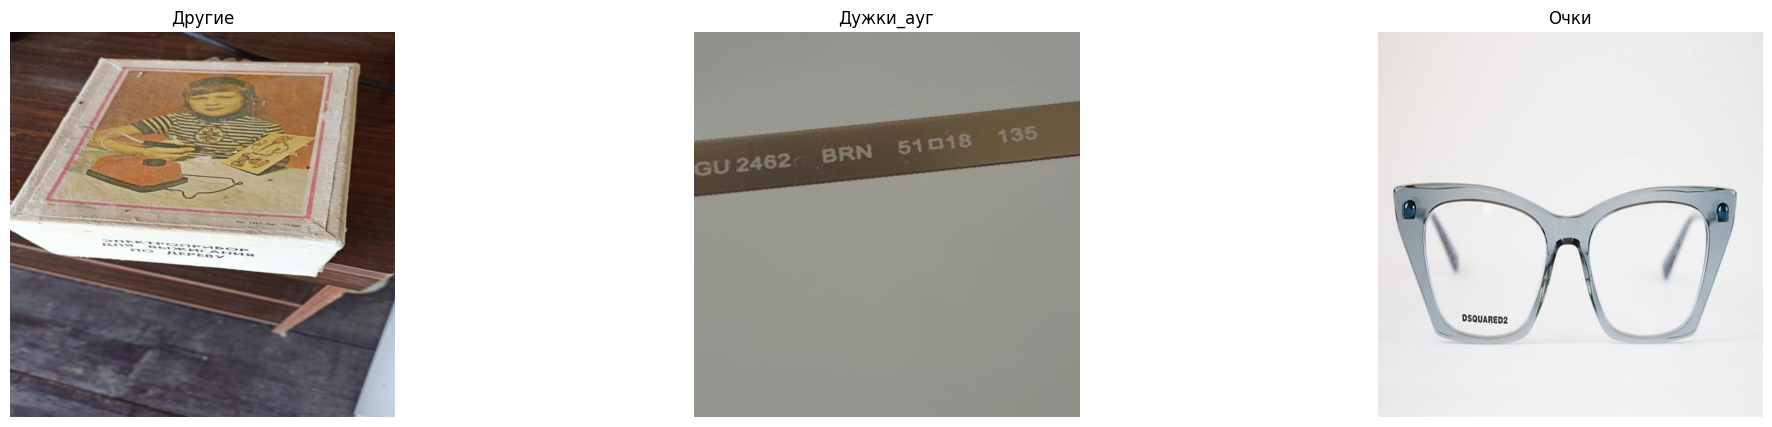

In [ ]:
# Создание заготовки для изображений всех классов
fig, axs = plt.subplots(1, CLASS_COUNT, figsize=(25, 5))

# Для всех номеров классов:
for i in range(CLASS_COUNT):
    # Формирование пути к папке содержимого класса
    path = f'{IMAGE_PATH}{CLASS_LIST[i]}/'
    # Выбор случайного фото из i-го класса
    img_path = path + random.choice(os.listdir(path))
    # Отображение фотографий
    axs[i].set_title(CLASS_LIST[i])
    axs[i].imshow(Image.open(img_path))
    axs[i].axis('off')

# Отрисовка всего полотна
plt.show()

In [ ]:
class_name = CLASS_LIST[0]
class_name

'Другие'

In [ ]:
IMAGE_PATH

'/content/img/data_ind/'

In [ ]:
class_path = IMAGE_PATH + class_name
class_path

'/content/img/data_ind/Другие'

In [ ]:
data_files = []                           # Cписок путей к файлам картинок
data_labels = []                          # Список меток классов, соответствующих файлам


for class_label in range(CLASS_COUNT):    # Для всех классов по порядку номеров (их меток)
    class_name = CLASS_LIST[class_label]  # Выборка имени класса из списка имен
    class_path = IMAGE_PATH + class_name  # Формирование полного пути к папке с изображениями класса

    class_files = os.listdir(class_path)  # Получение списка имен файлов с изображениями текущего класса
    print(f'Размер класса {class_name} составляет {len(class_files)} фото')

    # Добавление к общему списку всех файлов класса с добавлением родительского пути
    data_files += [f'{class_path}/{file_name}' for file_name in class_files]

    # Добавление к общему списку меток текущего класса - их ровно столько, сколько файлов в классе
    data_labels += [class_label] * len(class_files)
    print('Общий размер базы для обучения:', len(data_labels))

Размер класса Другие составляет 3039 фото
Общий размер базы для обучения: 3039
Размер класса Дужки_ауг составляет 2820 фото
Общий размер базы для обучения: 5859
Размер класса Очки составляет 2623 фото
Общий размер базы для обучения: 8482


In [ ]:
# # Ожидаемая размерность
# expected_shape = (640, 640, 3)

# # Найти и удалить элементы с отличной размерностью
# for img in data_files:
#   a=np.array(Image.open(img))
#   if a.shape != expected_shape:
#       #data_files.remove(img)
#       print(img)

In [ ]:
# a = np.array(Image.open(data_files[1300]))
# a.shape

# Просмотр 1300-ого фото, размера фото и метки из общей базы размера 1431

(640, 640)
0


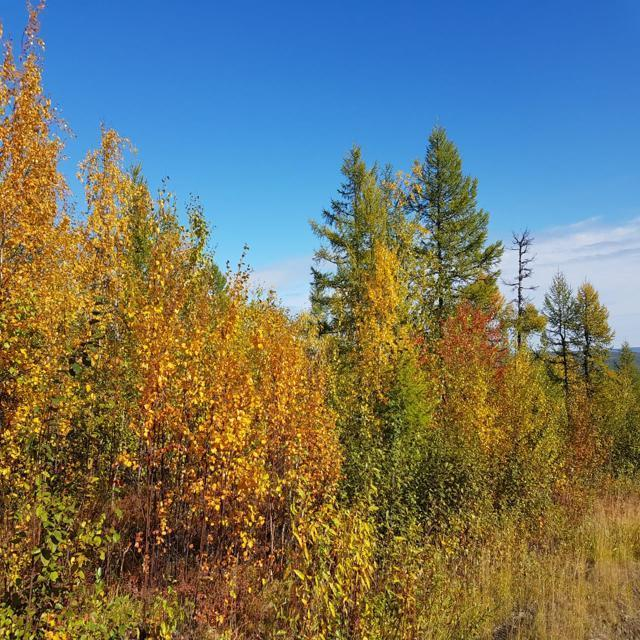

In [ ]:
img  = Image.open(data_files[1300])
print(img.size)
print(data_labels[1300])
img

# Получение списка файлов data_img c размерностью IMG_WIDTHхIMG_HEIGHT если надо

In [ ]:
IMG_WIDTH           = 128      # Ширина изображения для нейросети
IMG_HEIGHT          = 64   # Высота изображения для нейросети

In [ ]:
data_images = []                          # Пустой список для данных изображений

for file_name in data_files:
    # Открытие и смена размера изображения
    img = Image.open(file_name).resize((IMG_WIDTH, IMG_HEIGHT))
    img_np = np.array(img)                # Перевод в numpy-массив
    data_images.append(img_np)            # Добавление изображения в виде numpy-массива к общему списку

x_data = np.array(data_images)            # Перевод общего списка изображений в numpy-массив
y_data = np.array(data_labels)            # Перевод общего списка меток класса в numpy-массив

print(f'В массив собрано {len(data_images)} фотографий следующей формы: {img_np.shape}')
print(f'Общий массив данных изображений следующей формы: {x_data.shape}')
print(f'Общий массив меток классов следующей формы: {y_data.shape}')

В массив собрано 8482 фотографий следующей формы: (64, 128, 3)
Общий массив данных изображений следующей формы: (8482, 64, 128, 3)
Общий массив меток классов следующей формы: (8482,)


# Подготовка выборок

In [ ]:
x_data = x_data/255   # Нормализация

In [ ]:
y_data = np.array(data_labels)
# Преобразование данных в формат one_hot_encoding
from tensorflow.keras.utils import to_categorical
y_data = to_categorical(y_data, 3)
y_data[5400]

array([0., 1., 0.], dtype=float32)

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(x_data, # ----------------- датасет с изображениям
                                                    y_data, # ----------------- датасет с метками
                                                    test_size = 0.1, # --- процент тестовых значений
                                                    shuffle=True, # ------ перемешивание
                                                    random_state=42) # ---


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_data, # ----------------- датасет с изображениям
                                                    y_data, # ----------------- датасет с метками
                                                    test_size = 0.2, # --- процент тестовых значений
                                                    shuffle=True, # ------ перемешивание
                                                    random_state=42) # ---
print(f'Общий массив данных изображений следующей формы: {x_train.shape}')
print(f'Общий массив меток классов следующей формы: {y_train.shape}')
print(f'Общий массив данных проверочных изображений следующей формы: {x_val.shape}')
print(f'Общий массив проверочных меток классов следующей формы: {y_val.shape}')
print(f'Общий массив тестовых данных  изображений следующей формы: {x_test.shape}')
print(f'Общий массив тестовых меток классов следующей формы: {y_test.shape}')


Общий массив данных изображений следующей формы: (6785, 64, 128, 3)
Общий массив меток классов следующей формы: (6785, 3)
Общий массив данных проверочных изображений следующей формы: (1697, 64, 128, 3)
Общий массив проверочных меток классов следующей формы: (1697, 3)
Общий массив тестовых данных  изображений следующей формы: (849, 64, 128, 3)
Общий массив тестовых меток классов следующей формы: (849, 3)


# Cоздание модели

In [ ]:
EPOCHS              = 150         # Число эпох обучения
BATCH_SIZE          = 24                    # Размер батча для обучения модели
OPTIMIZER           = Adam(0.0001)
CLASS_COUNT         = 3

IMG_CHANNELS        = 3

In [ ]:
# Создание последовательной модели
model_conv = Sequential()

# Первый сверточный слой
model_conv.add(Conv2D(256, (3, 3), padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH  , IMG_CHANNELS)))
model_conv.add(BatchNormalization())

# Второй сверточный слой
model_conv.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model_conv.add(MaxPooling2D(pool_size=(3, 3)))

# Третий сверточный слой
model_conv.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model_conv.add(BatchNormalization())
model_conv.add(Dropout(0.2))

# Четвертый сверточный слой
model_conv.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model_conv.add(MaxPooling2D(pool_size=(3, 3)))
model_conv.add(Dropout(0.2))

# Пятый сверточный слой
model_conv.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model_conv.add(BatchNormalization())

# Шестой сверточный слой
model_conv.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))
model_conv.add(MaxPooling2D(pool_size=(3, 3)))
model_conv.add(Dropout(0.2))

# Слой преобразования многомерных данных в одномерные
model_conv.add(Flatten())

# Промежуточный полносвязный слой
model_conv.add(Dense(2048, activation='relu'))

# Промежуточный полносвязный слой
model_conv.add(Dense(4096, activation='relu'))
# Выходной полносвязный слой с количеством нейронов по количесту классов
model_conv.add(Dense(CLASS_COUNT, activation='softmax'))

In [ ]:
    # Вывод сводки
model_conv.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 128, 256)      7168      
                                                                 
 batch_normalization (Batch  (None, 64, 128, 256)      1024      
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 128, 256)      590080    
                                                                 
 max_pooling2d (MaxPooling2  (None, 21, 42, 256)       0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 42, 256)       590080    
                                                                 
 batch_normalization_1 (Bat  (None, 21, 42, 256)       1

# Настройка callback с сохранением лучшей модели и остановкой обучения

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
# Создание обратного вызова EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1)
checkpoint = ModelCheckpoint('/content/drive/Othercomputers/Ноутбук/colab/стажировка/all_img/' + 'best_model.h5', monitor='val_accuracy',
                             save_best_only=True, mode='max', verbose=1)

In [ ]:
model_conv.compile(optimizer=OPTIMIZER,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Загрузка обученной модели и дообучение

In [ ]:
# from tensorflow.keras.models import load_model

# model_conv = load_model("/content/drive/Othercomputers/Ноутбук/colab/стажировка/all_img/best_model.h5")

In [ ]:
 # Обучение модели с заданными параметрами
history = model_conv.fit( x_train,y_train,
                        epochs=EPOCHS  ,
                      batch_size=BATCH_SIZE,
                        validation_data=(x_val, y_val),callbacks=[checkpoint, early_stopping])

Epoch 1/150
283/283 [==============================] - ETA: 0s - loss: 0.1155 - accuracy: 0.9673
Epoch 1: val_accuracy improved from -inf to 0.32940, saving model to /content/drive/Othercomputers/Ноутбук/colab/стажировка/all_img/best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


283/283 [==============================] - 79s 218ms/step - loss: 0.1155 - accuracy: 0.9673 - val_loss: 3.5838 - val_accuracy: 0.3294
Epoch 2/150
283/283 [==============================] - ETA: 0s - loss: 0.0255 - accuracy: 0.9935
Epoch 2: val_accuracy improved from 0.32940 to 0.88273, saving model to /content/drive/Othercomputers/Ноутбук/colab/стажировка/all_img/best_model.h5
283/283 [==============================] - 65s 230ms/step - loss: 0.0255 - accuracy: 0.9935 - val_loss: 0.2804 - val_accuracy: 0.8827
Epoch 3/150
283/283 [==============================] - ETA: 0s - loss: 0.0468 - accuracy: 0.9909
Epoch 3: val_accuracy improved from 0.88273 to 0.99823, saving model to /content/drive/Othercomputers/Ноутбук/colab/стажировка/all_img/best_model.h5
283/283 [==============================] - 66s 233ms/step - loss: 0.0468 - accuracy: 0.9909 - val_loss: 0.0047 - val_accuracy: 0.9982
Epoch 4/150
283/283 [==============================] - ETA: 0s - loss: 0.0732 - accuracy: 0.9892
Epoch 4: 

# Сохранение и загрузка истории обучения для последующего использования  

In [ ]:
import pickle

# Сохранение переменной history
with open('/content/drive/Othercomputers/Ноутбук/colab/стажировка/all_img/history2.pkl', 'wb') as f:
    pickle.dump(history, f)

In [ ]:
# Загрузка переменной history с Google Диска
with open('/content/drive/Othercomputers/Ноутбук/colab/стажировка/all_img/history2.pkl', 'rb') as f:
    history = pickle.load(f)

# Отображение графиков обучения

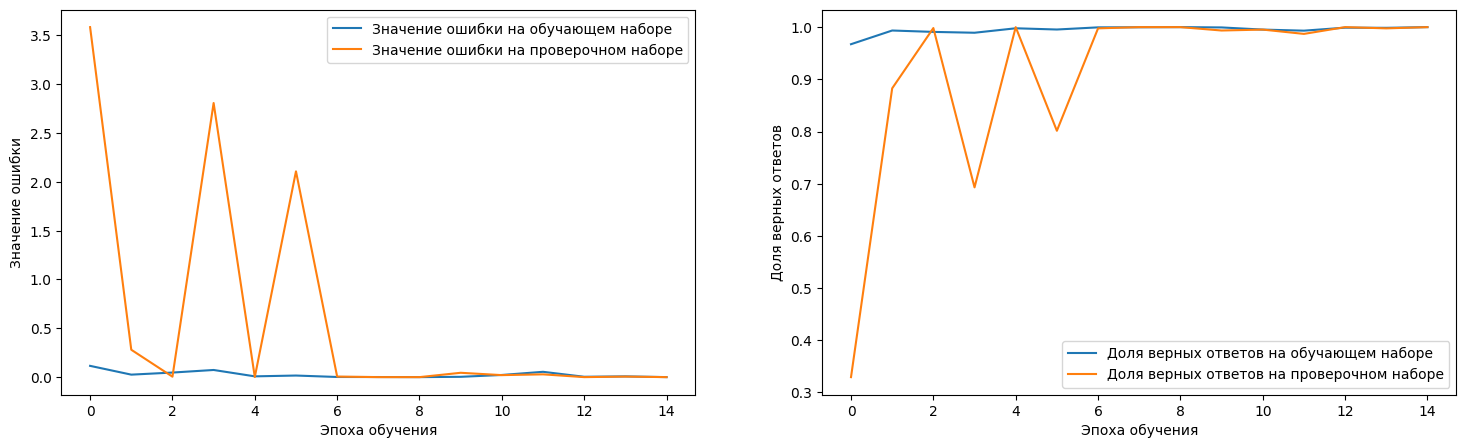

In [ ]:
# Создание полотна для рисунка
plt.figure(1, figsize=(18, 5))

# Задание первой (левой) области для построения графиков
plt.subplot(1, 2, 1)
# Отрисовка графиков 'loss' и 'val_loss' из значений словаря store_learning.history
plt.plot(history.history['loss'],
         label='Значение ошибки на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Значение ошибки на проверочном наборе')
# Задание подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение ошибки')
plt.legend()

# Задание второй (правой) области для построения графиков
plt.subplot(1, 2, 2)
# Отрисовка графиков 'accuracy' и 'val_accuracy' из значений словаря store_learning.history
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
# Задание подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()

# Фиксация графиков и рисование всей картинки
plt.show()

# Загрузка лучшей модели и проверка ее работы на тестовых данных

In [ ]:
from tensorflow.keras.models import load_model

model_conv = load_model("/content/drive/Othercomputers/Ноутбук/colab/стажировка/all_img/best_model.h5")

## Доля верных ответов на тестовых данных, в процентах: evaluate

In [ ]:
scores = model_conv.evaluate(x_test, y_test, verbose=1)
print(scores)
print('Доля верных ответов на тестовых данных, в процентах: {:7.4%}'.format(scores[1]))

27/27 [==============================] - 4s 55ms/step - loss: 5.7740e-04 - accuracy: 1.0000
[0.0005774009041488171, 1.0]
Доля верных ответов на тестовых данных, в процентах: 100.0000%


# Построение "Матрици  ошибок"

In [ ]:
# Импорт метода построения confusion_matrix
from sklearn.metrics import confusion_matrix
# Импорт метода визуализации confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Получение предсказанных значений модели для тестового набора данных

y_pred = model_conv.predict(x_test)
 # округление до целых чисел и преобразование в одномерный массив
#y_pred = np.round(y_pred).flatten()  Мы пойдем другим путем более наглядным

# Получение истинных значений тестового набора данных
# y_test = test_a_generator.classes
y_true = y_test

27/27 [==============================] - 2s 53ms/step


In [ ]:
# x = np.expand_dims(x, axis=0)
x1 =  np.expand_dims(x_test[20], axis=0)
# Проверка формы данных
print(x1.shape)

(1, 64, 128, 3)


In [ ]:
# Распознавание примера
prediction = model_conv.predict(x1)
print(prediction)

1/1 [==============================] - 0s 401ms/step
[[3.5833393e-14 1.0000000e+00 3.7818158e-22]]


In [ ]:
pred = np.argmax(y_true[20])
print(f'Распознанный класс: {pred}')
pred

Распознанный класс: 1


1

In [ ]:
y_pred[1]

array([5.1464997e-07, 6.3529669e-08, 9.9999940e-01], dtype=float32)

In [ ]:
y_true[1]

array([0., 0., 1.], dtype=float32)

In [ ]:
len(y_true)

849

In [ ]:
y_true[1:5]

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [ ]:
from pandas.core.arrays.arrow import array
true_y= []
pred_y =[]
for i in range(len(y_true)):
  true_y.append(np.argmax(y_true[i]))
  pred_y.append(np.argmax(y_pred[i]))
true = np.array(true_y)
pred = np.array(pred_y)

print(true[1:5])
print(pred[1:5])


[2 0 0 1]
[2 0 0 1]


In [ ]:

# Построение матрицы ошибок
cm = confusion_matrix(true, pred)

print(cm)

[[318   0   0]
 [  0 271   0]
 [  0   0 260]]


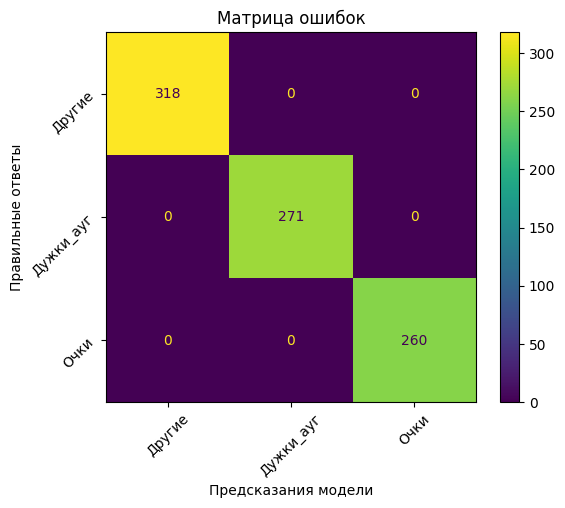

In [ ]:
# Построение confusion matrix
#cm = confusion_matrix(y_true, y_pred)
cm = confusion_matrix(true, pred)
TEST_CLASS_LIST = sorted(os.listdir(IMAGE_PATH))

# # Визуализация матрицы ошибок
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['Пластик', 'Метал'])
display_label = np.arange(len(TEST_CLASS_LIST))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = display_label)
disp.plot()

plt.title('Матрица ошибок')
plt.xticks(display_label, TEST_CLASS_LIST, rotation=45)
plt.yticks(display_label, TEST_CLASS_LIST, rotation=45)
plt.xlabel('Предсказания модели')
plt.ylabel('Правильные ответы')
plt.show()

# Выводы